In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [63]:
# Load the data
features_df = pd.read_csv("dengue_features_train.csv")
labels_df = pd.read_csv("dengue_labels_train.csv")

In [64]:
# Merge the dataframes
df = pd.merge(features_df, labels_df, on=['city', 'year', 'weekofyear'])
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


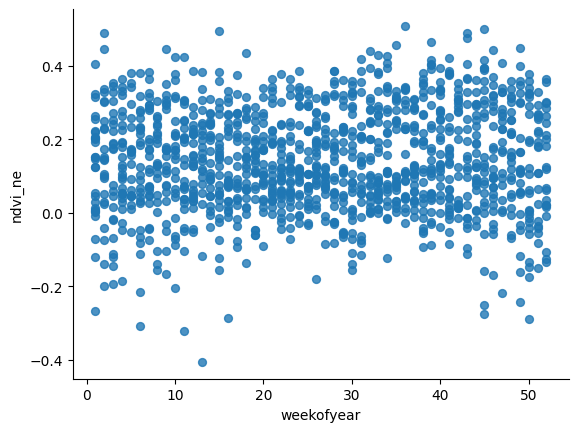

In [65]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='weekofyear', y='ndvi_ne', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

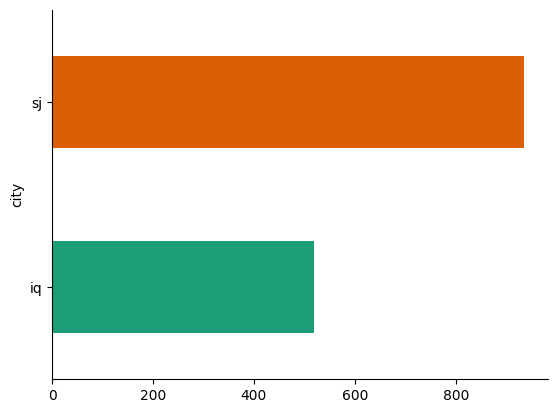

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include='number')), columns=df.select_dtypes(include='number').columns)

In [68]:
# Separate features and target variable
X = df_imputed.drop(columns=['total_cases'])
y = df_imputed['total_cases']

In [69]:
# Normalizing the data
scaler = StandardScaler()
X_train_poly_normalized = scaler.fit_transform(X_train_poly)
X_test_poly_normalized = scaler.transform(X_test_poly)

In [70]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Polynomial features
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

In [73]:
# Predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

In [78]:
# Calculate mean absolute error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R^2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R-squared Score (Train):", r2_train)
print("R-squared Score (Test):", r2_test)

Mean Absolute Error (Train): 16.86217393235166
Mean Absolute Error (Test): 26.635401946345777
R-squared Score (Train): 0.37819204129159556
R-squared Score (Test): 0.2368251400960406


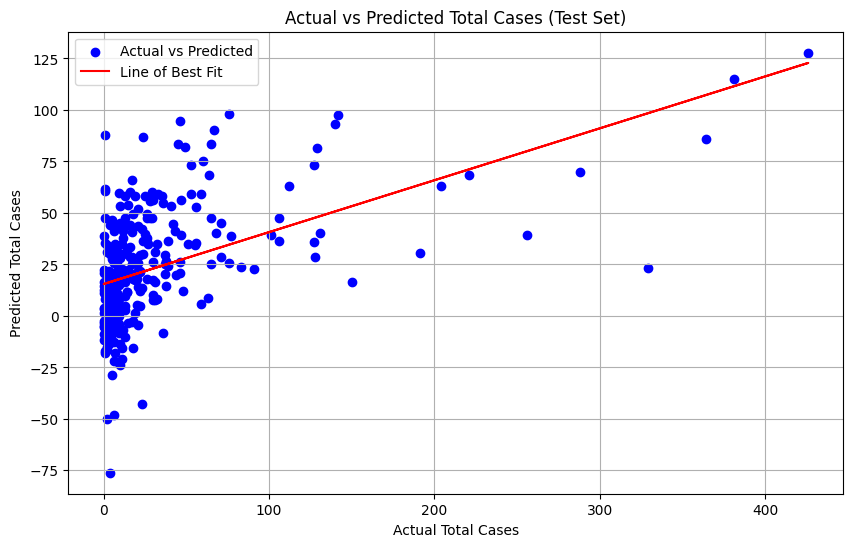

In [75]:
# Plotting the actual vs predicted for test set with line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')
plt.title('Actual vs Predicted Total Cases (Test Set)')

# Adding line of best fit
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', label='Line of Best Fit')

plt.grid(True)
plt.legend()
plt.show()

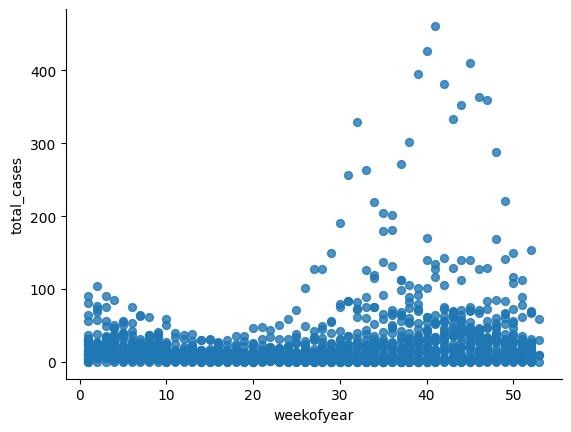

In [76]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='weekofyear', y='total_cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

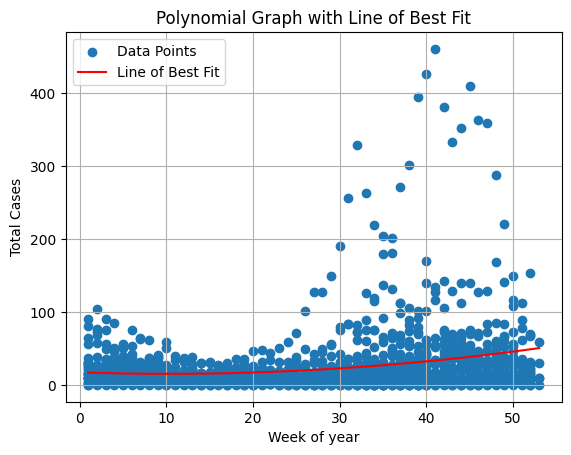

In [77]:
# Extracting x and y values from the dataset
x = df['weekofyear']
y = df['total_cases']

# Degree of the polynomial
degree = 2

# Polynomial fit
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)
line_x = np.linspace(min(x), max(x), 100)
line_y = poly(line_x)

# Plotting
plt.scatter(x, y, label='Data Points')
plt.plot(line_x, line_y, color='red', label='Line of Best Fit')
plt.xlabel('Week of year')
plt.ylabel('Total Cases')
plt.title('Polynomial Graph with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()